## Khai báo các thư viện cần dùng

In [1021]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.impute import SimpleImputer


# Phần I. TIỀN XỬ LÝ DỮ LIỆU

In [1022]:
# Đọc dữ liệu từ file CSV
file_path = '../data/Life Expectancy Data.csv'  
df = pd.read_csv(file_path)

# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Ý nghĩa của các thuộc tính trong dữ liệu:

1. Country: Tên quốc gia.
2. Year: Năm thu thập dữ liệu.
3. Status: Trạng thái phát triển (Developed/Developing).
4. Life expectancy: Tuổi thọ trung bình (đầu ra - target).
5. Adult Mortality: Tỷ lệ tử vong ở người lớn.
6. Infant deaths: Số trẻ sơ sinh tử vong trên 1000 dân.
7. Alcohol: Tiêu thụ rượu bình quân đầu người.
8. Percentage expenditure: Chi tiêu y tế chiếm phần trăm GDP.
9. Hepatitis B: Tỷ lệ tiêm chủng viêm gan B.
10. Measles: Số ca sởi trên 1000 dân.
11. BMI: Chỉ số khối cơ thể trung bình.
12. Under-five deaths: Số trẻ dưới 5 tuổi tử vong trên 1000 dân.
13. Polio: Tỷ lệ tiêm chủng bại liệt.
14. Total expenditure: Tổng chi tiêu y tế chiếm phần trăm GDP.
15. Diphtheria: Tỷ lệ tiêm chủng bạch hầu.
16. HIV/AIDS: Số ca tử vong do HIV/AIDS trên 1000 dân.
17. GDP: GDP bình quân đầu người.
18. Population: Dân số quốc gia.
19. Thinness 1-19 years: Tỷ lệ gầy ở trẻ 1-19 tuổi.
20. Thinness 5-9 years: Tỷ lệ gầy ở trẻ 5-9 tuổi.
21. Income composition of resources: Chỉ số phân bổ thu nhập.
22. Schooling: Số năm học trung bình.

Các thuộc tính này dùng để dự đoán tuổi thọ trung bình dựa trên yếu tố y tế - xã hội.

Hiển thị kích thước của bảng dữ liệu

In [1023]:
df.shape

(2938, 22)

Hiển thị thông tin tóm tắt về DataFrame df. Cụ thể cung cấp các thông tin sau:
- Số hàng và số cột của df
- Tên cột và loại dữ liệu tương ứng của từng cột
- Số lượng giá trị không bị thiếu của từng cột
- Tổng dung lượng bộ nhớ mà df sử dụng

In [1024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Thống kê mô tả của target (Life expectancy)

In [1025]:
df['Life expectancy'].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

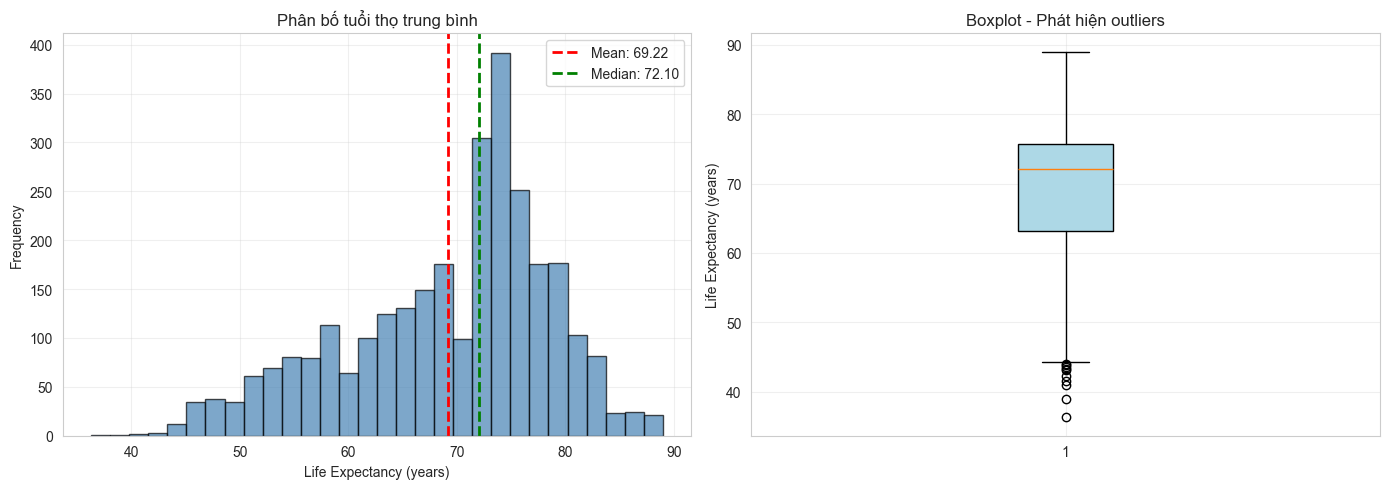

In [1026]:
# VẼ BIỂU ĐỒ PHÂN BỐ TARGET
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE
axes[0].hist(df['Life expectancy'].dropna(), bins=30, alpha=0.7, 
             color='steelblue', edgecolor='black')
axes[0].axvline(df['Life expectancy'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f"Mean: {df['Life expectancy'].mean():.2f}")
axes[0].axvline(df['Life expectancy'].median(), color='green', 
                linestyle='--', linewidth=2, label=f"Median: {df['Life expectancy'].median():.2f}")
axes[0].set_xlabel('Life Expectancy (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Phân bố tuổi thọ trung bình')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
box = axes[1].boxplot(df['Life expectancy'].dropna(), vert=True, patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
axes[1].set_ylabel('Life Expectancy (years)')
axes[1].set_title('Boxplot - Phát hiện outliers')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Lệnh df.isna().sum() trong pandas được sử dụng để kiểm tra số lượng giá trị bị thiếu (NaN - Not a Number) trong mỗi cột của DataFrame df. Cụ thể:

df.isna(): Trả về một DataFrame với các giá

- df.isna(): Trả về một DataFrame với các giá trị boolean, trong đó True chỉ ra giá trị bị thiếu (NaN) và False chỉ ra giá trị không bị thiếu.
- sum(): Tổng hợp số lượng giá trị True (giá trị bị thiếu) trong mỗi cột. Kết quả là một danh sách cho biết số lượng giá trị thiếu trong từng cột của DataFrame.

In [1027]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [1028]:
# Tính toán missing values
missing_before = df.isna().sum()
missing_count = missing_before.sum()

print(f"Tổng số missing values: {missing_count} ({missing_count/df.size*100:.2f}%)")
print(f"\nChi tiết missing values theo từng cột:")
print(missing_before[missing_before > 0].sort_values(ascending=False))

Tổng số missing values: 2563 (3.97%)

Chi tiết missing values theo từng cột:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64


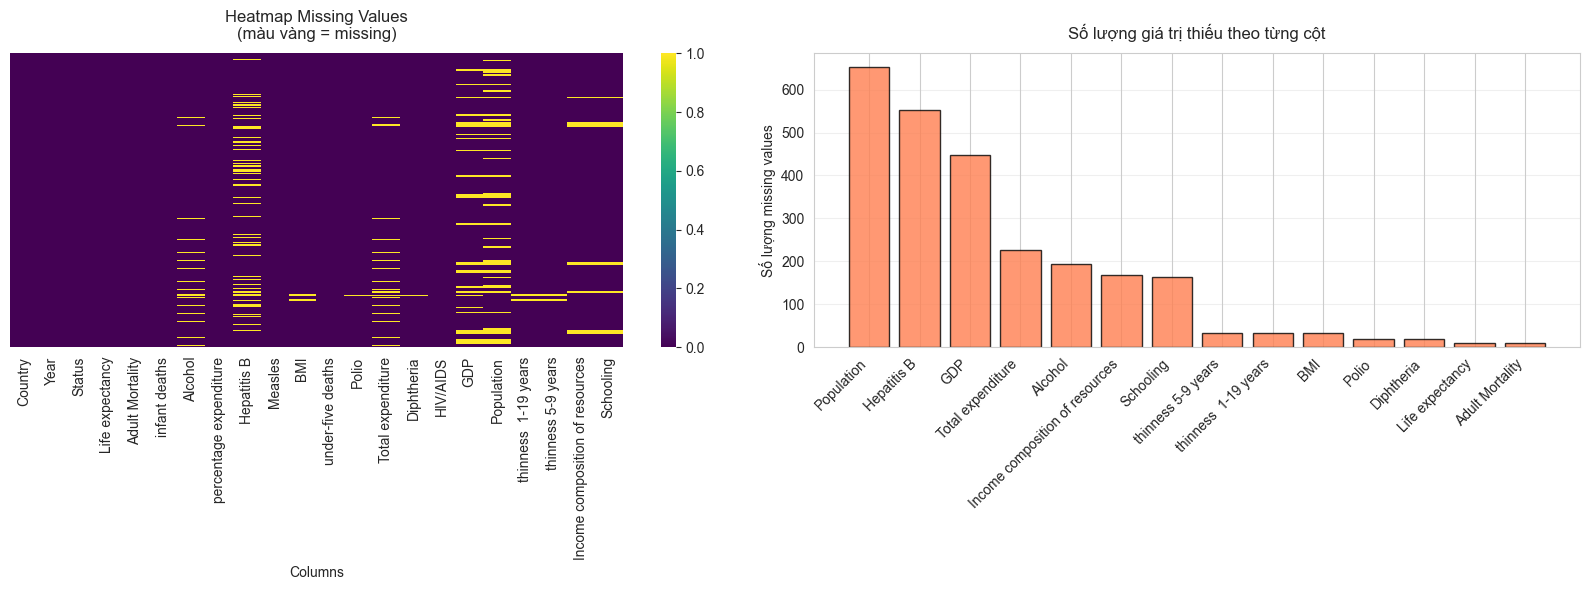

In [1029]:
# VẼ 2 BIỂU ĐỒ MISSING VALUES (trên cùng 1 figure)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Heatmap
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Heatmap Missing Values\n(màu vàng = missing)', fontsize=12, pad=10)
axes[0].set_xlabel('Columns')

# Subplot 2: Bar chart
missing_df = missing_before[missing_before > 0].sort_values(ascending=False)
axes[1].bar(range(len(missing_df)), missing_df.values, color='coral', edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(missing_df)))
axes[1].set_xticklabels(missing_df.index, rotation=45, ha='right')
axes[1].set_ylabel('Số lượng missing values')
axes[1].set_title('Số lượng giá trị thiếu theo từng cột', fontsize=12, pad=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### Xử lý missing values

#### Xử lý giá trị thiếu (Missing Values)

> **Công thức**:  
> $$
\hat{x}_{ij} = \frac{1}{n} \sum_{k=1}^{n} x_{kj} \quad \text{(nếu dùng mean)}
$$

> **Chiến lược**: Dùng `SimpleImputer(strategy='mean')`

In [1030]:
# Impute target trước
if df['Life expectancy'].isna().sum() > 0:
    target_mean = df['Life expectancy'].mean()
    target_imputer = SimpleImputer(strategy='mean')
    df['Life expectancy'] = target_imputer.fit_transform(df[['Life expectancy']])
    print(f"✓ Đã impute 'Life expectancy' bằng mean = {target_mean:.2f}")

# Impute numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Life expectancy')
numeric_cols.remove('Year')

imputer_num = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])
print(f"✓ Đã impute {len(numeric_cols)} features numeric bằng mean")

# Kiểm tra sau khi xử lý
missing_after = df.isnull().sum().sum()
print(f"\nMissing values sau xử lý: {missing_after}")
print(f"Đã xử lý thành công {missing_count - missing_after} missing values!")

✓ Đã impute 'Life expectancy' bằng mean = 69.22
✓ Đã impute 18 features numeric bằng mean

Missing values sau xử lý: 0
Đã xử lý thành công 2563 missing values!


### Mã hóa categorical features

DROP 'Country' vì:
- Có 193 unique values → tạo 192 dummy columns
- Gây curse of dimensionality, overfitting
- Country đã được thể hiện gián tiếp qua GDP, Schooling, Status, etc.

In [1031]:
# DROP Country để tránh curse of dimensionality
df = df.drop('Country', axis=1)

# One-Hot Encoding cho Status (chỉ có 2 values: Developed/Developing)
print("\n One-Hot Encoding cho 'Status' (drop_first=True để tránh multicollinearity)")
print(f"  Trước encoding: Status có {df['Status'].nunique()} unique values")
df = pd.get_dummies(df, columns=['Status'], drop_first=True)
print(f"  Sau encoding: Tạo cột 'Status_Developing' (0=Developed, 1=Developing)")


 One-Hot Encoding cho 'Status' (drop_first=True để tránh multicollinearity)
  Trước encoding: Status có 2 unique values
  Sau encoding: Tạo cột 'Status_Developing' (0=Developed, 1=Developing)


Kích thước dữ liệu sau preprocessing

In [1032]:
df.shape

(2938, 21)


In dữ liệu sau khi làm sạch (5 dòng đầu)

In [1033]:

df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


Tổng số features

In [1034]:
print(f"\nTổng số features: {df.shape[1] - 1} (không tính target)")


Tổng số features: 20 (không tính target)


# PHẦN 2: PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU

## 1. Tách đầu vào và đầu ra

- Loại bỏ Life expectancy khỏi df
- axis = 1 --> xóa cột
- Phần còn lại của df <-- X: các biến đầu vào để dự đoán đầu ra y là Life expectancy

In [1035]:
# Tách đầu vào và đầu ra
X = df.drop(['Life expectancy'], axis=1)  # Loại bỏ target
y = df['Life expectancy']

Chia dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set)

train_test_split: Đây là hàm từ thư viện scikit-learn, được sử dụng để chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra.

test_size=0.3:

- test_size chỉ định tỷ lệ dữ liệu sẽ được dùng làm tập kiểm tra.
- Ở đây, test_size=0.3 có nghĩa là 30% dữ liệu sẽ được sử dụng cho tập kiểm tra, và 80% dữ liệu còn lại sẽ được dùng cho tập huấn luyện.

random_state=42:

- random_state là một tham số được sử dụng để đảm bảo tính tái lập (reproducibility).
- Khi ta thiết lập random_state=42, việc chia dữ liệu sẽ luôn tạo ra cùng một kết quả mỗi khi bạn chạy mã, đảm bảo kết quả là nhất quán khi bạn thử lại.
- Giá trị 42 không có ý nghĩa đặc biệt, nó chỉ là một số được dùng làm hạt ngẫu nhiên (random seed).

Kết quả của train_test_split: Hàm này trả về bốn biến:

- X_train: Tập đặc trưng huấn luyện, chứa 70% của X: gồm 70% mẫu dữ liệu của nhãn M, 70% mẫu dữ liệu của nhãn B.
- X_test: Tập đặc trưng kiểm tra, chứa 30% của X: gồm 30% mẫu dữ liệu của nhãn M, 30% mẫu dữ liệu của nhãn B.
- y_train: Tập nhãn huấn luyện, chứa 70% của y: là nhãn của X_train, tỷ lệ như trên.
- y_test: Tập nhãn kiểm tra, chứa 30% của y.

In [1036]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 2. Phân tích thành phần chính PCA

### a. Chuẩn hóa dữ liệu

Đoạn mã này sử dụng StandardScaler từ thư viện scikit-learn để chuẩn hóa dữ liệu. Việc chuẩn hóa là một bước rất quan trọng trong quy trình học máy, đặc biệt là đối với các mô hình nhạy cảm với sự khác biệt về đơn vị đo của các đặc trưng (như SVM, KNN, Logistic Regression,...).

StandardScaler: Đây là một công cụ trong scikit-learn dùng để chuẩn hóa các đặc trưng của dữ liệu bằng cách tạo ra dữ liệu có phân phối chuẩn (normal distribution) với:

Mean (trung bình) = 0.
Standard Deviation (độ lệch chuẩn) = 1.
Công thức chuẩn hóa

Xét lần lượt từng cột thuộc tính, với mỗi giá trị ( x ) thì ta chuẩn hóa thành x_scaled như sau:
$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$
Trong đó:

( x ) là giá trị của dữ liệu.
( N ) là số mẫu dữ liệu, ở đây cụ thể bằng 569.
( mu ) là giá trị trung bình của đặc trưng, được tính như sau:
                    $$
                    \mu = \frac{x1 + x2 + x3 + ... +xN}{N} 
                    $$

( sigma ) là độ lệch chuẩn của đặc trưng, được tính như sau:
                    $$
                    \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
                    $$

In [1037]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Đã chuẩn hóa: mean ≈ 0, std ≈ 1")
print(f"X_train_scaled: mean={X_train_scaled.mean():.6f}, std={X_train_scaled.std():.6f}")

Đã chuẩn hóa: mean ≈ 0, std ≈ 1
X_train_scaled: mean=-0.000000, std=1.000000


### Thực hiện giảm chiều bằng PCA
pca = PCA()

- PCA(): Đây là cách khởi tạo một đối tượng của lớp PCA từ thư viện scikit-learn.
- Khi khởi tạo PCA mà không truyền thêm tham số, PCA sẽ giữ lại tất cả các thành phần chính của dữ liệu.

fit_transform(): Đây là một phương thức kết hợp hai bước trong quá trình PCA:

- fit(): Phương thức này học các thành phần chính từ bộ dữ liệu huấn luyện (X_train_scaled). Nó sẽ tính toán ma trận hiệp phương sai của dữ liệu và tìm các thành phần chính.
- transform(): Sau khi đã "học" xong các thành phần chính, phương thức transform() sẽ chiếu dữ liệu gốc vào không gian mới được tạo ra bởi các thành phần chính.

In [1038]:
# Thực hiện PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

### Phân tích phương sai giải thích
pca.explained_variance_ratio_:

- Đây là thuộc tính của đối tượng PCA sau khi đã thực hiện fit() trên dữ liệu. Nó trả về tỷ lệ phương sai giải thích của mỗi thành phần chính.
- Phương sai giải thích cho biết mức độ quan trọng của mỗi thành phần chính trong việc giải thích sự biến thiên trong dữ liệu.

Kết quả explained_variance là một mảng chứa tỷ lệ phương sai giải thích của từng thành phần chính.

np.cumsum(): Đây là hàm trong thư viện NumPy tính tổng dồn của một mảng. Cộng dồn các giá trị của explained_variance để tính tổng phương sai giải thích của tất cả các thành phần chính đến một thành phần chính cụ thể.

cumulative_variance: Kết quả là một mảng chứa tổng phương sai giải thích tích lũy của các thành phần chính.

In [1039]:
# Phân tích phương sai giải thích
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

### Vẽ biểu đồ phương sai giải thích PCA.

Biểu đồ này sẽ giúp bạn hiểu được mức độ đóng góp của các thành phần chính trong PCA vào phương sai tổng thể, với một ngưỡng được chỉ ra để xác định số lượng thành phần chính cần thiết để giải thích ít nhất 95% phương sai của dữ liệu.

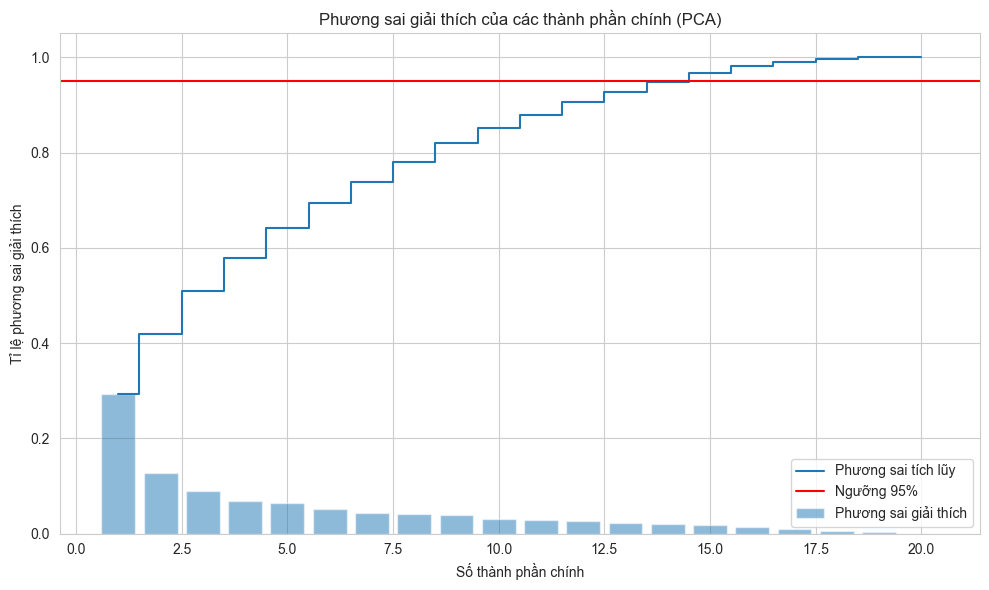

In [1040]:
# Vẽ đồ thị phương sai giải thích
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Phương sai giải thích')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Phương sai tích lũy')
plt.axhline(y=0.95, color='r', linestyle='-', label='Ngưỡng 95%')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỉ lệ phương sai giải thích')
plt.title('Phương sai giải thích của các thành phần chính (PCA)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('../results/figures/pca_explained_variance.png')

### Xác định số thành phần chính cần để giữ 95% phương sai

cumulative_variance >= 0.95:

- cumulative_variance là mảng chứa phương sai tích lũy của các thành phần chính (được tính bằng cách cộng dồn explained_variance).
- Câu lệnh này kiểm tra điều kiện, trả về một mảng boolean (True/False), nơi mỗi giá trị tương ứng với việc liệu phương sai tích lũy ở đó có lớn hơn hoặc bằng 95% hay không.

np.argmax()

- np.argmax() trả về chỉ số (index) của phần tử đầu tiên có giá trị True trong mảng boolean được tạo ra từ điều kiện cumulative_variance >= 0.95.
- Cộng 1 do np.argmax() trả về chỉ số bắt đầu từ 0, nhưng trong PCA, số thành phần chính bắt đầu từ 1

In [1041]:
# Xác định số thành phần chính cần để giữ 95% phương sai
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Số thành phần chính cần để giữ 95% phương sai: {n_components_95}")

Số thành phần chính cần để giữ 95% phương sai: 15


In [1042]:
# Áp dụng PCA với số thành phần được chọn
pca_95 = PCA(n_components=n_components_95)
X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
X_test_pca_95 = pca_95.transform(X_test_scaled)

### Trực quan hóa dữ liệu PCA

Trực quan hóa dữ liệu sau khi áp dụng PCA bằng cách vẽ biểu đồ phân tán cho hai thành phần chính đầu tiên. Việc này giúp hình dung sự phân bố và mối quan hệ giữa các mẫu dữ liệu trong không gian giảm chiều.

Màu sắc của các điểm dựa trên target y_train (numeric, dùng palette continuous) giúp ta thấy rõ sự gradient theo tuổi thọ.

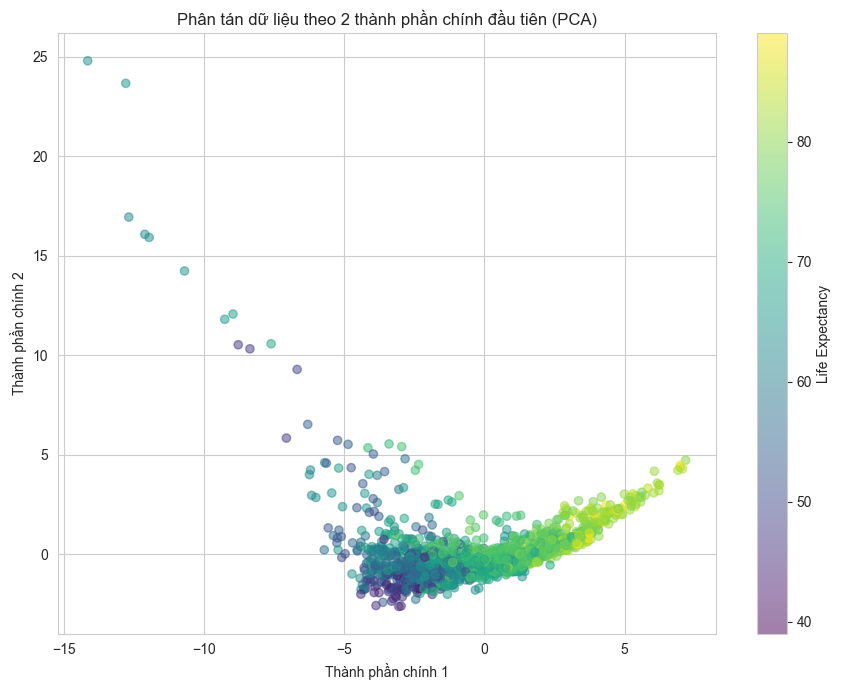

In [1043]:
# Trực quan hóa dữ liệu PCA
# Vẽ biểu đồ phân tán cho 2 thành phần chính đầu tiên
plt.figure(figsize=(9, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Life Expectancy')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('Phân tán dữ liệu theo 2 thành phần chính đầu tiên (PCA)')
plt.tight_layout()
plt.savefig('../results/figures/pca_scatter_plot.png')

## 3. Phân tích lựa chọn đặc trưng: SelectKBest

### a. Giới thiệu về SelectKBest

**SelectKBest** là một phương pháp **feature selection** (lựa chọn đặc trưng) thuộc loại **supervised learning**, có nghĩa là nó sử dụng thông tin từ biến mục tiêu (target) để đánh giá và chọn ra K features quan trọng nhất.

### Ưu điểm:
- Giữ nguyên ý nghĩa của các features gốc (dễ diễn giải)
- Giảm số chiều dữ liệu, tránh overfitting
- Loại bỏ các features không có ý nghĩa thống kê
- Tăng tốc độ training model

### Nhược điểm:
- Không xử lý multicollinearity (tương quan cao giữa các features)
- Đánh giá từng feature độc lập (không xem xét tương tác giữa các features)

### b. Phương pháp f_regression

**f_regression** là hàm tính toán **F-statistic** giữa mỗi feature và target trong bài toán regression.

#### Công thức F-statistic:

$$
F = \frac{\text{Variance giải thích bởi feature}}{\text{Variance còn lại (residual)}}
$$

Cụ thể hơn:

$$
F = \frac{MS_{regression}}{MS_{residual}} = \frac{SSR / 1}{SSE / (n-2)}
$$

Trong đó:
- **SSR** (Sum of Squares Regression): Tổng bình phương do hồi quy  
- **SSE** (Sum of Squares Error): Tổng bình phương sai số  
- **n**: Số mẫu dữ liệu  

#### Ý nghĩa:
- **F-statistic cao** → Feature có mối quan hệ tuyến tính mạnh với target  
- **F-statistic thấp** → Feature ít ảnh hưởng đến target  

---

### c. Code thực hiện SelectKBest


#### Bước 1: Tính F-statistic cho tất cả features
Giải thích:
- SelectKBest: Class từ sklearn.feature_selection
- score_func=f_regression: Sử dụng F-statistic làm tiêu chí đánh giá
- k='all': Tính điểm cho tất cả features
- fit(X_train_scaled, y_train): Tính F-statistic giữa từng feature và target

In [1044]:
# SelectKBest với f_regression (phù hợp cho regression task)
# f_regression: tính F-statistic giữa mỗi feature và target
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_scaled, y_train)

,score_func,<function f_r...001DF4DFAC2C0>
,k,'all'


#### Bước 2: Lấy điểm số và xếp hạng features
Giải thích:
- selector.scores_: Mảng numpy chứa F-statistic của từng feature
- sort_values: Sắp xếp giảm dần theo điểm số
- head(10): Hiển thị top 10 feature quan trọng nhất

In [1045]:
# Lấy điểm số của từng feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("\n✓ Top 10 features quan trọng nhất (theo F-statistic):")
print(feature_scores.head(10))


✓ Top 10 features quan trọng nhất (theo F-statistic):
                            Feature        Score
18                        Schooling  2186.352936
17  Income composition of resources  1953.288501
1                   Adult Mortality  1936.174684
12                         HIV/AIDS   935.386447
7                               BMI   926.685684
19                Status_Developing   613.135608
16               thinness 5-9 years   596.043992
15             thinness  1-19 years   590.594669
11                       Diphtheria   556.056202
9                             Polio   496.099644


#### Bước 3: Vẽ biểu đồ Feature Importance
Giải thích:
- plt.barh(): Biểu đồ cột ngang
- invert_yaxis(): Đảo chiều để feature quan trọng nhất ở trên cùng
- Feature có F-score cao → quan trọng hơn

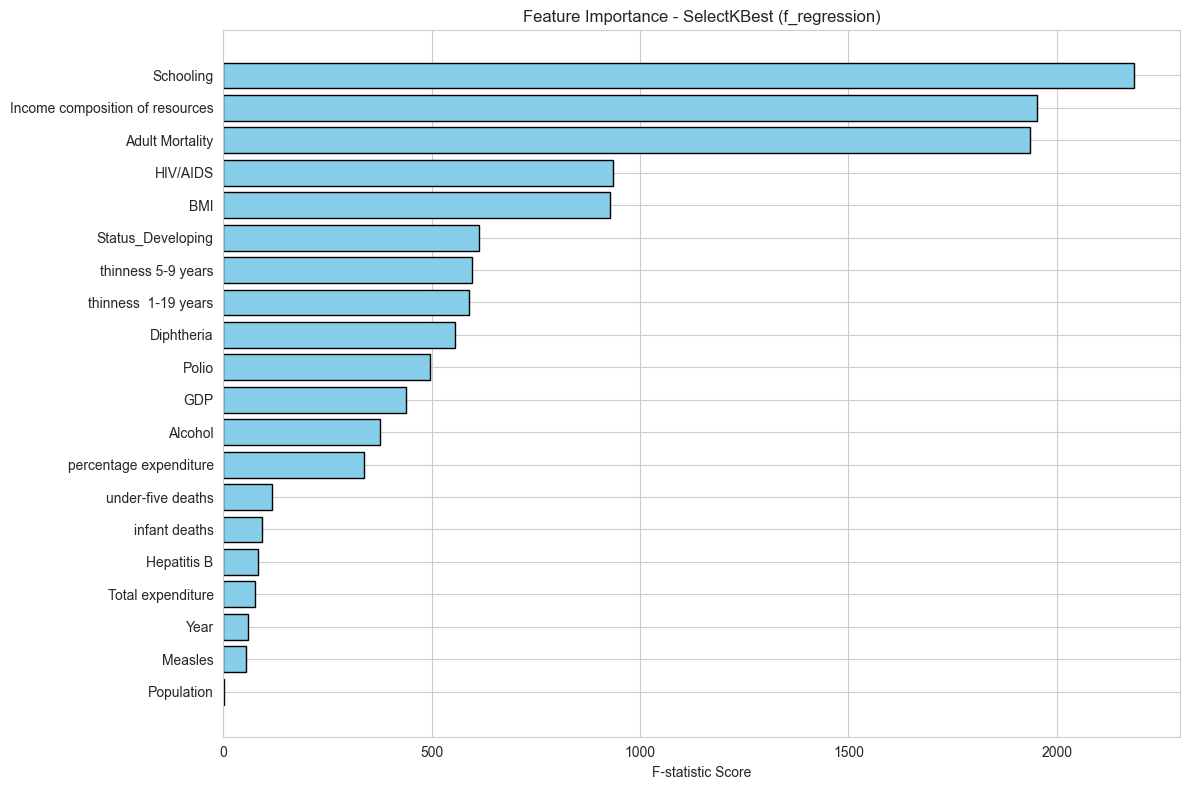

In [1046]:
# Vẽ biểu đồ feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_scores)), feature_scores['Score'], color='skyblue', edgecolor='black')
plt.yticks(range(len(feature_scores)), feature_scores['Feature'])
plt.xlabel('F-statistic Score')
plt.title('Feature Importance - SelectKBest (f_regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../results/figures/selectkbest_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

#### Bước 4: Chọn K features tốt nhất
Giải thích:
- fit_transform(): Tính toán và chọn K feature tốt nhất
- transform(): Áp dụng cùng phép chọn cho test set
- Giúp giảm số chiều dữ liệu mà vẫn giữ thông tin quan trọng nhất

In [1047]:
# Chọn K features tốt nhất (ví dụ: 10 features)
k_best = 10
selector_k = SelectKBest(score_func=f_regression, k=k_best)
X_train_kbest = selector_k.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector_k.transform(X_test_scaled)

#### Bước 5: Lấy tên các features được chọn
Giải thích:
- get_support(): Trả về mảng boolean cho biết feature nào được chọn
- X.columns[...]: Lấy tên cột tương ứng
- Giúp biết chính xác các feature nào được giữ lại

In [1048]:
# Lấy tên các features được chọn
selected_features = X.columns[selector_k.get_support()].tolist()

print(f"\n✓ Đã chọn {k_best} features tốt nhất:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

print(f"\n✓ X_train_kbest shape: {X_train_kbest.shape}")
print(f"✓ X_test_kbest shape: {X_test_kbest.shape}")


✓ Đã chọn 10 features tốt nhất:
1. Adult Mortality
2. BMI
3. Polio
4. Diphtheria
5. HIV/AIDS
6. thinness  1-19 years
7. thinness 5-9 years
8. Income composition of resources
9. Schooling
10. Status_Developing

✓ X_train_kbest shape: (2056, 10)
✓ X_test_kbest shape: (882, 10)


### d. Trực quan hóa Correlation Matrix
Ý nghĩa:
- Hiển thị mối tương quan giữa các feature được chọn và target
- Nếu có nhiều cặp feature tương quan mạnh (|r| > 0.8) → multicollinearity cao

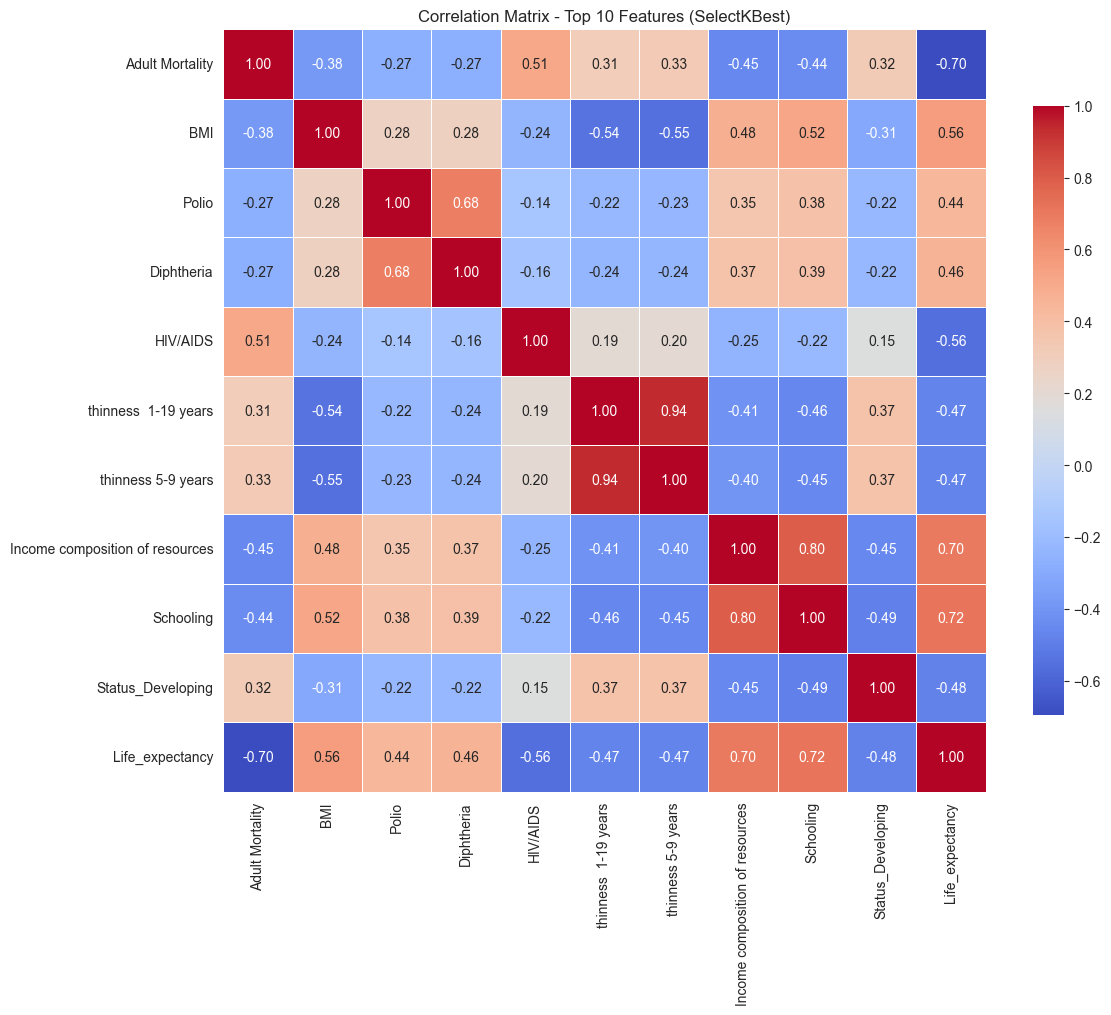

In [1049]:
# Trực quan hóa correlation matrix của K features được chọn
X_train_kbest_df = pd.DataFrame(X_train_kbest, columns=selected_features)
X_train_kbest_df['Life_expectancy'] = y_train.values

plt.figure(figsize=(12, 10))
correlation_matrix = X_train_kbest_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title(f'Correlation Matrix - Top {k_best} Features (SelectKBest)')
plt.tight_layout()
plt.savefig('../results/figures/selectkbest_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### e. Vẽ scatter plots cho Top 4 features
Giải thích:
- Quan sát mối quan hệ giữa top 4 features quan trọng nhất và target
- Pattern càng rõ → F-score càng cao

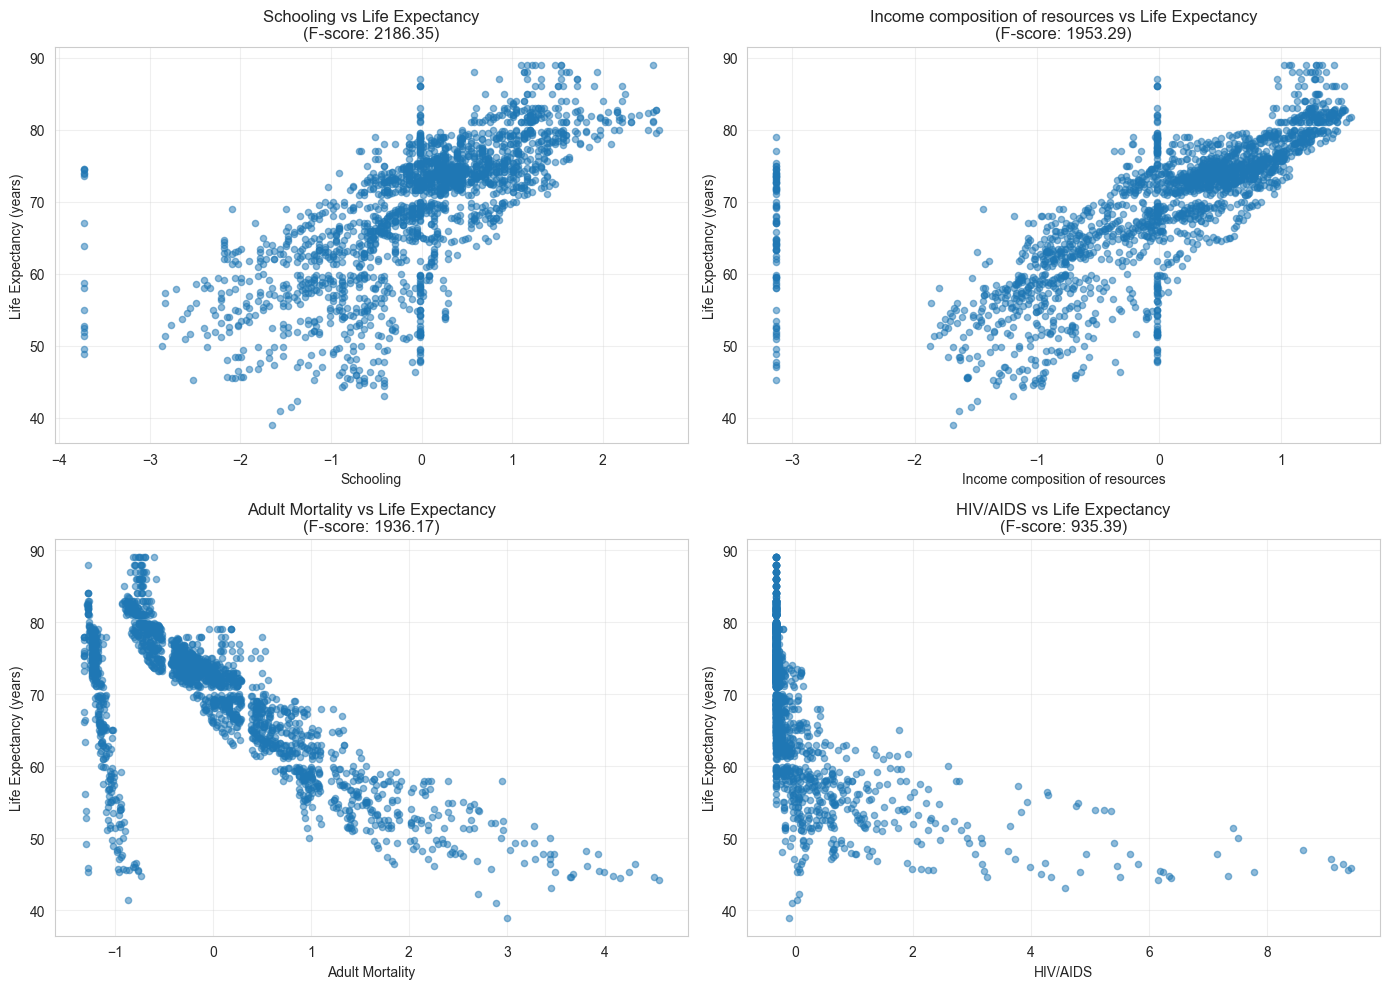

In [1050]:
# Vẽ scatter plots cho top 4 features vs Life expectancy
top_4_features = feature_scores.head(4)['Feature'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(top_4_features):
    feat_idx = X.columns.tolist().index(feature)
    axes[i].scatter(X_train_scaled[:, feat_idx], y_train, alpha=0.5, s=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Life Expectancy (years)')
    axes[i].set_title(f'{feature} vs Life Expectancy\n(F-score: {feature_scores[feature_scores["Feature"]==feature]["Score"].values[0]:.2f})')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/selectkbest_top4_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. So sánh và đánh giá

In [1051]:
# 4.1 Đánh giá phương sai giải thích trên tập kiểm tra
X_test_reconstructed_pca = np.dot(X_test_pca_95, pca_95.components_) + scaler.mean_
pca_variance_score = explained_variance_score(X_test_scaled, X_test_reconstructed_pca)

print("\n So sánh hai phương pháp giảm chiều:")
print("-" * 80)
print(f"PCA:")
print(f"  - Số chiều sau giảm: {n_components_95}")
print(f"  - Phương sai giải thích (test set): {pca_variance_score:.4f}")
print(f"  - Loại: Unsupervised (không dùng target)")
print(f"  - Ưu điểm: Giữ được variance, giảm multicollinearity")
print(f"  - Nhược điểm: Mất tính diễn giải của features gốc")

print(f"\nSelectKBest:")
print(f"  - Số chiều sau giảm: {k_best}")
print(f"  - Phương pháp: F-statistic (f_regression)")
print(f"  - Loại: Supervised (dùng target để chọn features)")
print(f"  - Ưu điểm: Giữ nguyên features gốc, dễ diễn giải")
print(f"  - Nhược điểm: Không xử lý multicollinearity")


 So sánh hai phương pháp giảm chiều:
--------------------------------------------------------------------------------
PCA:
  - Số chiều sau giảm: 15
  - Phương sai giải thích (test set): 0.9655
  - Loại: Unsupervised (không dùng target)
  - Ưu điểm: Giữ được variance, giảm multicollinearity
  - Nhược điểm: Mất tính diễn giải của features gốc

SelectKBest:
  - Số chiều sau giảm: 10
  - Phương pháp: F-statistic (f_regression)
  - Loại: Supervised (dùng target để chọn features)
  - Ưu điểm: Giữ nguyên features gốc, dễ diễn giải
  - Nhược điểm: Không xử lý multicollinearity


## 5. Trực quan hóa các thành phần chính quan trọng

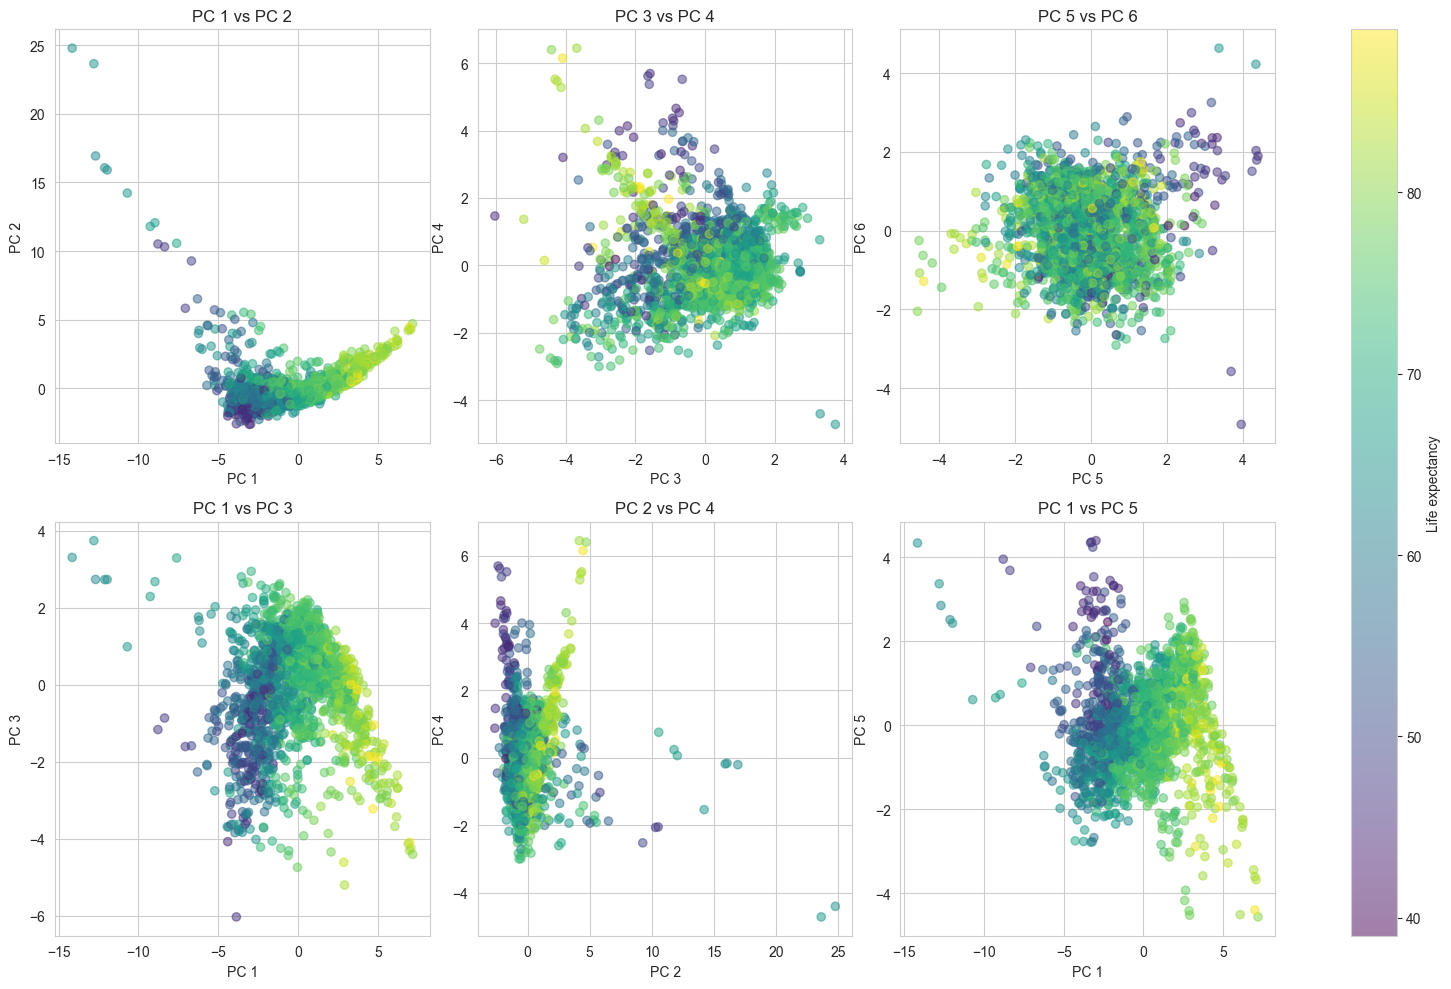

In [1052]:
# Trực quan hóa các thành phần chính quan trọng
if n_components_95 >= 6:
    # Vẽ biểu đồ phân tán cho 6 thành phần chính đầu tiên (cặp đôi)
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()

    pairs = [(0, 1), (2, 3), (4, 5), (0, 2), (1, 3), (0, 4)]

    for i, (pc1, pc2) in enumerate(pairs):
        scatter = axes[i].scatter(X_train_pca[:, pc1], X_train_pca[:, pc2], c=y_train, cmap='viridis', alpha=0.5)
        axes[i].set_xlabel(f'PC {pc1+1}')
        axes[i].set_ylabel(f'PC {pc2+1}')
        axes[i].set_title(f'PC {pc1+1} vs PC {pc2+1}')

    plt.tight_layout()
    plt.colorbar(scatter, ax=axes, label='Life expectancy')
    plt.savefig('../results/figures/pca_multiple_components.png')

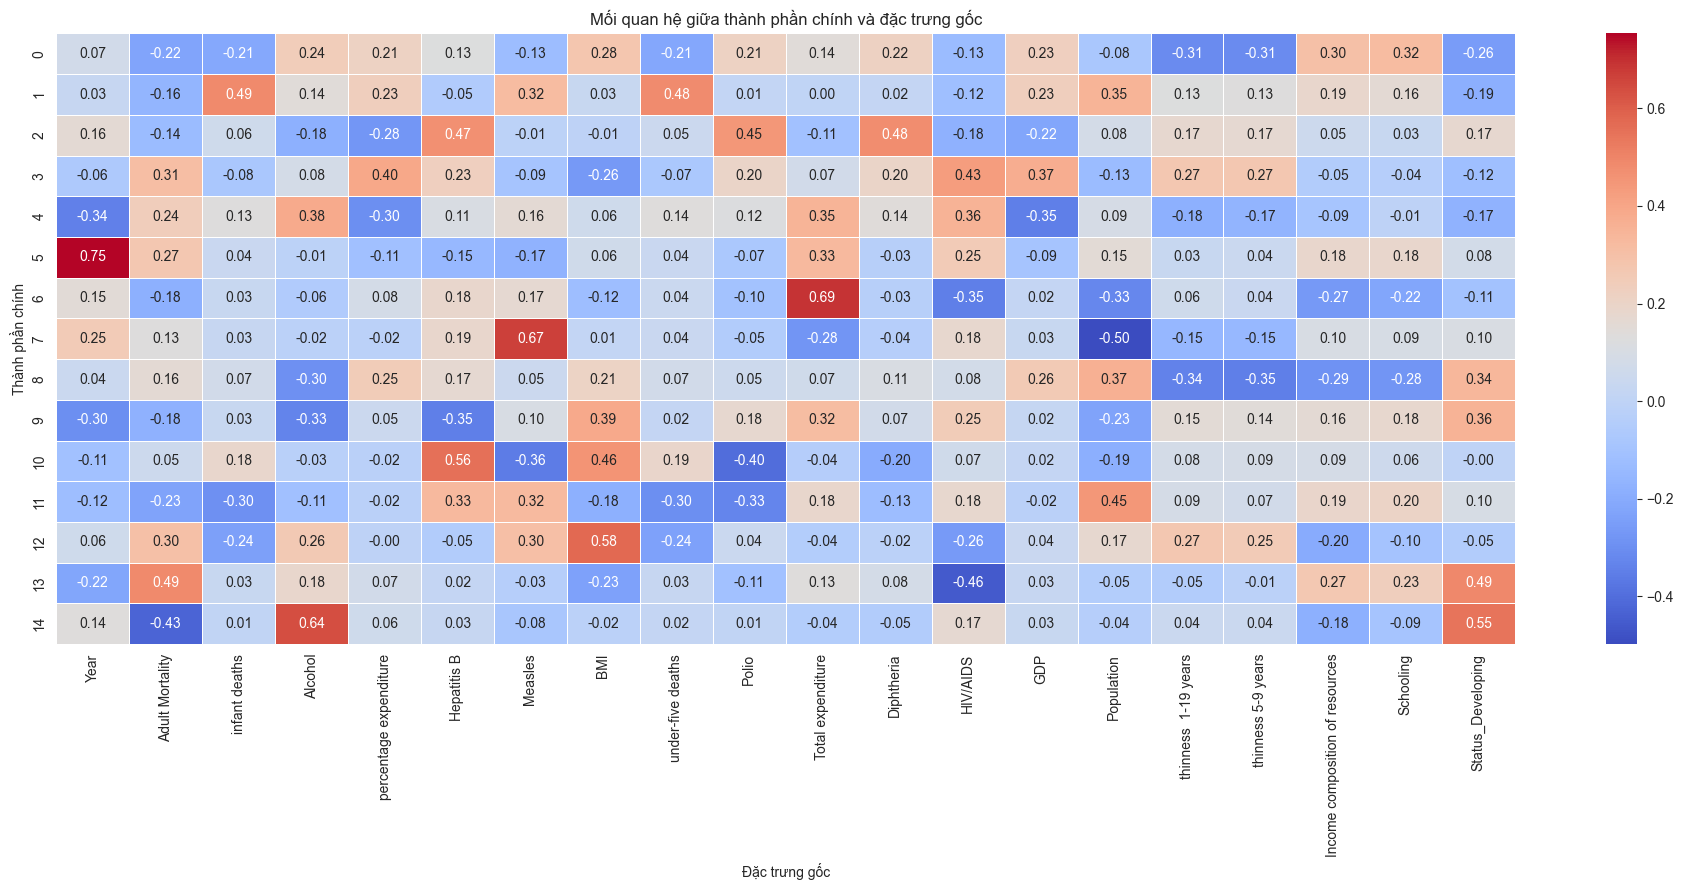

In [1053]:
# Phân tích mối quan hệ giữa các thành phần chính và các đặc trưng gốc
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns
)

plt.figure(figsize=(19, 9))
sns.heatmap(pca_components.iloc[:n_components_95], annot=True, cmap='coolwarm', 
            fmt='.2f', linewidths=0.5)
plt.xlabel('Đặc trưng gốc')
plt.ylabel('Thành phần chính')
plt.title('Mối quan hệ giữa thành phần chính và đặc trưng gốc')
plt.tight_layout()
plt.savefig('../results/figures/pca_features_correlation.png')


### LƯU DỮ LIỆU ĐÃ GIẢM CHIỀU

In [1054]:
# Lưu dữ liệu PCA
np.save('../dimensionality-reduced-data/X_train_pca.npy', X_train_pca_95)
np.save('../dimensionality-reduced-data/X_test_pca.npy', X_test_pca_95)
print("✓ Đã lưu dữ liệu PCA")

# Lưu dữ liệu SelectKBest
np.save('../dimensionality-reduced-data/X_train_kbest.npy', X_train_kbest)
np.save('../dimensionality-reduced-data/X_test_kbest.npy', X_test_kbest)
print("✓ Đã lưu dữ liệu SelectKBest")

# Lưu target
np.save('../dimensionality-reduced-data/y_train.npy', y_train)
np.save('../dimensionality-reduced-data/y_test.npy', y_test)
print("✓ Đã lưu target (y_train, y_test)")

# Lưu danh sách features được chọn
with open('../dimensionality-reduced-data/selected_features.txt', 'w', encoding='utf-8') as f:
    f.write(f"Top {k_best} features được chọn bởi SelectKBest:\n")
    f.write("-" * 50 + "\n")
    for i, feat in enumerate(selected_features, 1):
        score = feature_scores[feature_scores['Feature'] == feat]['Score'].values[0]
        f.write(f"{i}. {feat} (F-score: {score:.2f})\n")
print("✓ Đã lưu danh sách features được chọn")

print("HOÀN THÀNH! Phân tích và giảm chiều dữ liệu đã hoàn tất.")

✓ Đã lưu dữ liệu PCA
✓ Đã lưu dữ liệu SelectKBest
✓ Đã lưu target (y_train, y_test)
✓ Đã lưu danh sách features được chọn
HOÀN THÀNH! Phân tích và giảm chiều dữ liệu đã hoàn tất.


# PHẦN 3: Các mô hình hồi quy

## 3.1. K-nearest neighbors - KNN

K-nearest neighbor là một trong những thuật toán supervised-learning đơn giản nhất (mà hiệu quả trong một vài trường hợp) trong Machine Learning. Khi training, thuật toán này không học một điều gì từ dữ liệu training (đây cũng là lý do thuật toán này được xếp vào loại lazy learning), mọi tính toán được thực hiện khi nó cần dự đoán kết quả của dữ liệu mới. K-nearest neighbor có thể áp dụng được vào cả hai loại của bài toán Supervised learning là Classification và Regression. Chúng ta sẽ áp dụng thuật toán KNN vào bài toán dự đoán tuổi thọ trung bình dựa vào việc ta sẽ ước lượng độ tuổi của người dựa vào tuổi

In [1055]:
#Khai báo thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.neighbors import KNeighborsRegressor

Overfit: Mô hình học quá tốt trên train → Train R² cao, Test R² thấp 

Công thức kiểm tra:
- Nếu ΔR² > 0.05: Có dấu hiệu overfit
- Nếu ΔR² > 0.1: Overfit nặng

In [1056]:
# Hàm đánh giá mô hình
results_knn=[]

def evaluate(model, X_train, X_test, y_train, y_test, name, ratio_name):
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    delta_r2 = train_r2 - test_r2
    overfit = "Có" if delta_r2 > 0.05  else "Không"
    d = {
        'Tỉ lệ': ratio_name,
        'Dữ liệu': name,
        'Train R²': round(train_r2, 4),
        'Test R²': round(test_r2, 4),       
        'ΔR²': round(delta_r2, 4),
        'Train MSE': round(train_mse, 4),
        'Test MSE': round(test_mse, 4),
        'Overfit': overfit
    }
    results_knn.append(d)
    print(d)
    return test_r2

In [1057]:
# Danh sách tỉ lệ chia
split_ratios = [
    (0.8, 0.2, "80:20 (4:1)"),
    (0.7, 0.3, "70:30 (7:3)"),
    (0.6, 0.4, "60:40 (6:4)")
]

### 3.1.1 Hồi quy với dữ liệu gốc
- Sử dụng tất cả các features sau chuẩn hóa (X_scaled ~ 20)
- Fit mô hình
- Predict và đánh giá trên train/test
- Ta sẽ lấy k theo công thức k = $\sqrt{n}$

In [1058]:
print("Bắt đầu với DỮ LIỆU GỐC\n" + "="*50)
for train_size, test_size, ratio_name in split_ratios:
    print(f"\nTỉ lệ: {ratio_name}")
    
    # Chia dữ liệu
    X_train_orig_knn, X_test_orig_knn, y_train_orig_knn, y_test_orig_knn = train_test_split(
        X, y, train_size=train_size, random_state=30
    )

    # Chuẩn hóa (fit trên train, transform trên test)
    scaler = StandardScaler()
    X_train_scaled_knn = scaler.fit_transform(X_train_orig_knn)
    X_test_scaled_knn = scaler.transform(X_test_orig_knn)

    # Huấn luyện mô hình hồi quy
    knn = KNeighborsRegressor(n_neighbors=54,weights="uniform",metric="manhattan")
    knn.fit(X_train_scaled_knn, y_train_orig_knn)

    # Đánh giá
    evaluate(knn, X_train_scaled_knn, X_test_scaled_knn, y_train_orig_knn, y_test_orig_knn, "Dữ liệu gốc", ratio_name)

Bắt đầu với DỮ LIỆU GỐC

Tỉ lệ: 80:20 (4:1)
{'Tỉ lệ': '80:20 (4:1)', 'Dữ liệu': 'Dữ liệu gốc', 'Train R²': 0.8905, 'Test R²': 0.8693, 'ΔR²': 0.0212, 'Train MSE': 9.7048, 'Test MSE': 12.5967, 'Overfit': 'Không'}

Tỉ lệ: 70:30 (7:3)
{'Tỉ lệ': '70:30 (7:3)', 'Dữ liệu': 'Dữ liệu gốc', 'Train R²': 0.8835, 'Test R²': 0.8796, 'ΔR²': 0.0039, 'Train MSE': 10.3054, 'Test MSE': 11.3792, 'Overfit': 'Không'}

Tỉ lệ: 60:40 (6:4)
{'Tỉ lệ': '60:40 (6:4)', 'Dữ liệu': 'Dữ liệu gốc', 'Train R²': 0.8747, 'Test R²': 0.8704, 'ΔR²': 0.0043, 'Train MSE': 10.956, 'Test MSE': 12.2405, 'Overfit': 'Không'}


### 3.1.2 Hồi quy với dữ liệu giảm chiều
- Sử dụng X_pca (giảm từ ~20 xuống ~8-10 components, giữ 95% variance).

In [1059]:
print("\nBắt đầu với DỮ LIỆU PCA\n" + "="*50)

for train_size, test_size, ratio_name in split_ratios:
    print(f"\nTỉ lệ: {ratio_name}")
    
    X_train_pca_knn, X_test_pca_knn, y_train_pca_knn, y_test_pca_knn = train_test_split(
        X, y, train_size=train_size,random_state=30
    )
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_pca_knn)
    X_test_scaled = scaler.transform(X_test_pca_knn)
    # Phân tích phương sai giải thích
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    # Xác định số thành phần chính cần để giữ 95% phương sai
    n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    # Áp dụng PCA với số thành phần được chọn
    pca_95 = PCA(n_components=n_components_95)
    X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
    X_test_pca_95 = pca_95.transform(X_test_scaled)
    
    # Linear Regression
    knn_pca = KNeighborsRegressor(n_neighbors=54,weights="uniform",metric="manhattan")
    knn_pca.fit(X_train_pca_95, y_train_pca_knn)
    evaluate(knn_pca, X_train_pca_95, X_test_pca_95, y_train_pca_knn, y_test_pca_knn, "Dữ liệu PCA", ratio_name)


Bắt đầu với DỮ LIỆU PCA

Tỉ lệ: 80:20 (4:1)
{'Tỉ lệ': '80:20 (4:1)', 'Dữ liệu': 'Dữ liệu PCA', 'Train R²': 0.8454, 'Test R²': 0.8274, 'ΔR²': 0.0181, 'Train MSE': 13.7024, 'Test MSE': 16.64, 'Overfit': 'Không'}

Tỉ lệ: 70:30 (7:3)
{'Tỉ lệ': '70:30 (7:3)', 'Dữ liệu': 'Dữ liệu PCA', 'Train R²': 0.8363, 'Test R²': 0.8388, 'ΔR²': -0.0025, 'Train MSE': 14.4767, 'Test MSE': 15.2303, 'Overfit': 'Không'}

Tỉ lệ: 60:40 (6:4)
{'Tỉ lệ': '60:40 (6:4)', 'Dữ liệu': 'Dữ liệu PCA', 'Train R²': 0.8249, 'Test R²': 0.8282, 'ΔR²': -0.0033, 'Train MSE': 15.313, 'Test MSE': 16.2301, 'Overfit': 'Không'}


In [1060]:
print("\nBắt đầu với DỮ LIỆU SelectKbest\n" + "="*50)

for train_size, test_size, ratio_name in split_ratios:
    print(f"\nTỉ lệ: {ratio_name}")
    
    X_train_slkb_knn, X_test_slkb_knn, y_train_slkb_knn, y_test_slkb_knn = train_test_split(
        X, y, train_size=train_size,random_state=30
    )
    #Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_slkb_scaled = scaler.fit_transform(X_train_slkb_knn)
    X_test_slkb_scaled = scaler.transform(X_test_slkb_knn)
    #B1: Tính F-statistic cho tất cả features
    select = SelectKBest(score_func=f_regression, k='all')
    select.fit(X_train_slkb_scaled, y_train_slkb_knn)
    #B2: Lấy điểm só và xếp hạng features
    feature_scores_slkb_knn = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)

    print("\n✓ Top 10 features quan trọng nhất (theo F-statistic):")
    print(feature_scores_slkb_knn.head(10))
    #B4 Chọn K features tốt nhất
    k_best_knn = 10
    select_k  =SelectKBest(score_func=f_regression,k=k_best_knn)
    X_train_slkb = select_k.fit_transform(X_train_slkb_scaled,y_train_slkb_knn)
    X_test_slkb = select_k.transform(X_test_slkb_scaled)

    knn_slkb = KNeighborsRegressor(n_neighbors=54,weights="uniform",metric="manhattan")
    knn_slkb.fit(X_train_slkb,y_train_slkb_knn)
    print()
    evaluate(knn_slkb, X_train_slkb, X_test_slkb, y_train_slkb_knn, y_test_slkb_knn, "Dữ liệu Select KBest", ratio_name)
    print("="*50)
    
    
    


Bắt đầu với DỮ LIỆU SelectKbest

Tỉ lệ: 80:20 (4:1)

✓ Top 10 features quan trọng nhất (theo F-statistic):
                            Feature        Score
18                        Schooling  2186.352936
17  Income composition of resources  1953.288501
1                   Adult Mortality  1936.174684
12                         HIV/AIDS   935.386447
7                               BMI   926.685684
19                Status_Developing   613.135608
16               thinness 5-9 years   596.043992
15             thinness  1-19 years   590.594669
11                       Diphtheria   556.056202
9                             Polio   496.099644

{'Tỉ lệ': '80:20 (4:1)', 'Dữ liệu': 'Dữ liệu Select KBest', 'Train R²': 0.8951, 'Test R²': 0.8784, 'ΔR²': 0.0168, 'Train MSE': 9.2958, 'Test MSE': 11.7249, 'Overfit': 'Không'}

Tỉ lệ: 70:30 (7:3)

✓ Top 10 features quan trọng nhất (theo F-statistic):
                            Feature        Score
18                        Schooling  2186.352936
17 

### So sánh nhận xét và đánh giá kết quả

In [1061]:
# Tạo bảng kết quả
results_df_knn = pd.DataFrame(results_knn)
display(results_df_knn)

# Lưu bảng
results_df_knn.to_csv('../results/knn_result/K-nearest neighbors_comparison.csv', index=False)

,Tỉ lệ,Dữ liệu,Train R²,Test R²,ΔR²,Train MSE,Test MSE,Overfit
0,80:20 (4:1),Dữ liệu gốc,0.8905,0.8693,0.0212,9.7048,12.5967,Không
1,70:30 (7:3),Dữ liệu gốc,0.8835,0.8796,0.0039,10.3054,11.3792,Không
2,60:40 (6:4),Dữ liệu gốc,0.8747,0.8704,0.0043,10.9560,12.2405,Không
3,80:20 (4:1),Dữ liệu PCA,0.8454,0.8274,0.0181,13.7024,16.6400,Không
4,70:30 (7:3),Dữ liệu PCA,0.8363,0.8388,-0.0025,14.4767,15.2303,Không
5,60:40 (6:4),Dữ liệu PCA,0.8249,0.8282,-0.0033,15.3130,16.2301,Không
6,80:20 (4:1),Dữ liệu Select KBest,0.8951,0.8784,0.0168,9.2958,11.7249,Không
7,70:30 (7:3),Dữ liệu Select KBest,0.8890,0.8885,0.0005,9.8186,10.5371,Không
8,60:40 (6:4),Dữ liệu Select KBest,0.8796,0.8808,-0.0011,10.5281,11.2648,Không


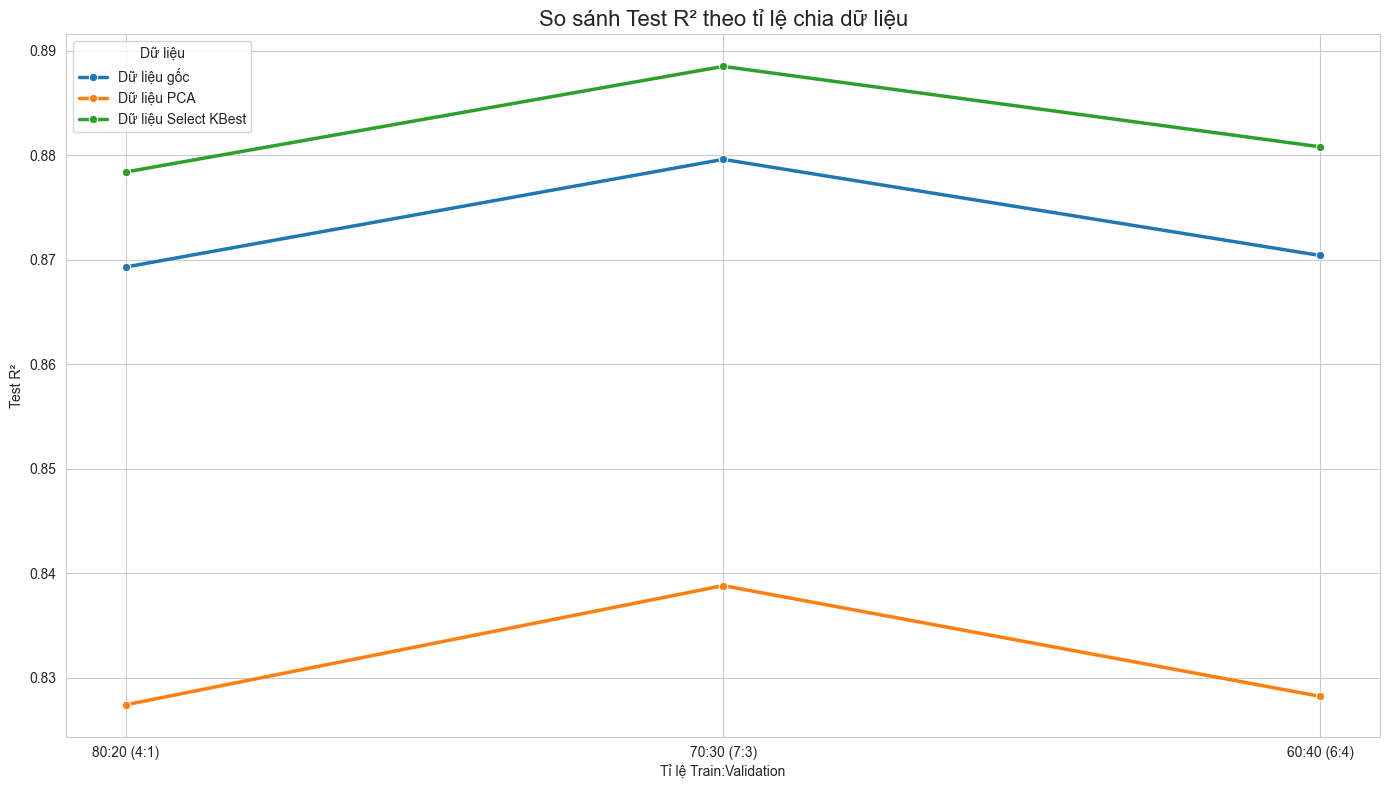

In [1062]:
plt.figure(figsize=(14, 8))

# Biểu đồ R² theo tỉ lệ
sns.set_style("whitegrid")
results_plot = results_df_knn[results_df_knn['Dữ liệu'].str.contains('gốc|PCA|Select KBest') & ~results_df_knn['Dữ liệu'].str.contains('Ridge|Lasso')]

sns.lineplot(data=results_plot, x='Tỉ lệ', y='Test R²', hue='Dữ liệu', marker='o', linewidth=2.5)
plt.title('So sánh Test R² theo tỉ lệ chia dữ liệu', fontsize=16)
plt.ylabel('Test R²')
plt.xlabel('Tỉ lệ Train:Validation')
plt.legend(title='Dữ liệu')
plt.tight_layout()
plt.savefig('../results/knn_result/r2_by_split_ratio.png', dpi=300)
plt.show()

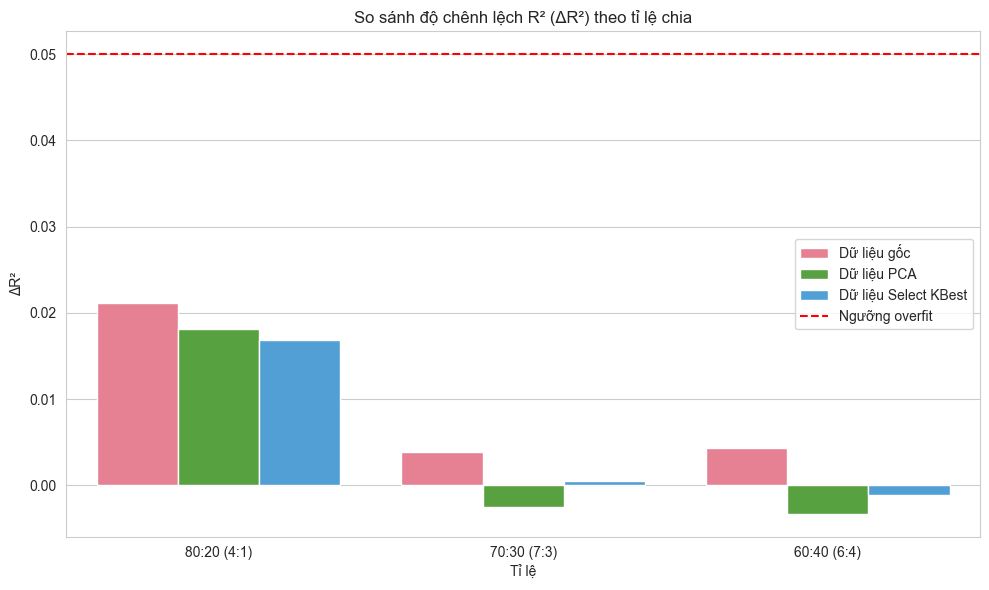

In [1063]:
# Biểu đồ ΔR² theo tỉ lệ
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_knn, x='Tỉ lệ', y='ΔR²', hue='Dữ liệu', palette='husl')
plt.axhline(0.05, color='red', linestyle='--', label='Ngưỡng overfit')
plt.title('So sánh độ chênh lệch R² (ΔR²) theo tỉ lệ chia')
plt.legend()
plt.tight_layout()
plt.savefig('../results/knn_result/delta_r2_comparison.png')
plt.show()

In [1064]:
# Lọc dữ liệu
df_orig = results_df_knn[results_df_knn['Dữ liệu'].str.contains('gốc')]
df_pca  = results_df_knn[results_df_knn['Dữ liệu'].str.contains('PCA')]
df_slkb = results_df_knn[results_df_knn['Dữ liệu'].str.contains('Select KBest')]

# Tính trung bình ΔR²
mean_orig = df_orig['ΔR²'].mean()
mean_pca  = df_pca['ΔR²'].mean()
mean_slkb = df_slkb['ΔR²'].mean()

# % giảm
percent_reduction_pca = ((mean_orig - mean_pca) / mean_orig) * 100
percent_reduction_slkb = ((mean_orig - mean_slkb) / mean_orig) * 100


print(f"ΔR² trung bình (dữ liệu gốc): {mean_orig:.4f}")
print(f"ΔR² trung bình (dữ liệu PCA):  {mean_pca:.4f}")
print(f"ΔR² trung bình (dữ liệu Select KBest):  {mean_slkb:.4f}")
print(f"PCA giúp giảm ΔR²: {percent_reduction_pca:.1f}%")
print(f"Select Kbest giúp giảm ΔR²: {percent_reduction_slkb: .1f}%")

ΔR² trung bình (dữ liệu gốc): 0.0098
ΔR² trung bình (dữ liệu PCA):  0.0041
ΔR² trung bình (dữ liệu Select KBest):  0.0054
PCA giúp giảm ΔR²: 58.2%
Select Kbest giúp giảm ΔR²:  44.9%


Nhận xét:
- Dữ liệu gốc luôn cho Test R² cao hơn PCA

## 3.2. Linear Regression

Kiến thức cơ bản
Hồi quy tuyến tính (Linear Regression) là một mô hình học máy cơ bản dùng để dự đoán giá trị liên tục (continuous) dựa trên các đặc trưng đầu vào. Trong dự án này, chúng ta sử dụng nó để dự đoán tuổi thọ trung bình (Life expectancy) – một biến số liên tục (từ khoảng 40-80 năm).

Mục tiêu: Tìm một hàm tuyến tính $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$ sao cho dự đoán $\hat{y}$ gần với $y$ thực tế nhất.

- $y$: Giá trị thực (target).
- $x_i$: Đặc trưng (features, ví dụ: GDP, Schooling).
- $\beta_0$: Hệ số chặn (intercept).
- $\beta_i$: Hệ số hồi quy (coefficients) – thể hiện mức độ ảnh hưởng của $x_i$ đến $y$.
- $\epsilon$: Sai số ngẫu nhiên (noise).

Phương pháp ước lượng: Ordinary Least Squares (OLS) – tối thiểu hóa tổng bình phương sai số (RSS: Residual Sum of Squares):

$RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2$

Giải bằng ma trận: $\hat{\beta} = (X^T X)^{-1} X^T y$, với $X$ là ma trận đặc trưng (thêm cột 1 cho intercept).

Trong dự án, chúng ta áp dụng trên:

- Dữ liệu gốc (sau scale, ~20 features).
- Dữ liệu PCA (giảm chiều, giữ 95% variance để tránh overfit).

Đánh giá:

- R² (Coefficient of Determination): $R^2 = 1 - \frac{RSS}{TSS}$, với TSS = tổng phương sai. Giá trị gần 1: mô hình giải thích tốt dữ liệu.
- MSE (Mean Squared Error): $MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2$. Càng nhỏ càng tốt.

Overfit: Nếu Train R² >> Test R², mô hình học "thuộc lòng" train data, kém trên data mới. Nguyên nhân: Quá nhiều features, noise.


In [1065]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.neighbors import KNeighborsRegressor

Overfit: Mô hình học quá tốt trên train → Train R² cao, Test R² thấp 

Công thức kiểm tra:
- Nếu ΔR² > 0.05: Có dấu hiệu overfit
- Nếu ΔR² > 0.1: Overfit nặng


In [1066]:
# Hàm đánh giá mô hình
results = []

def evaluate(model, X_train, X_test, y_train, y_test, name, ratio_name):
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    delta_r2 = train_r2 - test_r2
    overfit = "Có" if delta_r2 > 0.05 else "Không"
    d = {
        'Tỉ lệ': ratio_name,
        'Dữ liệu': name,
        'Train R²': round(train_r2, 4),
        'Test R²': round(test_r2, 4),
        'ΔR²': round(delta_r2, 4),
        'Train MSE': round(train_mse, 4),
        'Test MSE': round(test_mse, 4),
        'Overfit': overfit
    }
    results.append(d)
    print(d)
    return test_r2

In [1067]:
# Danh sách tỉ lệ chia
split_ratios = [
    (0.8, 0.2, "80:20 (4:1)"),
    (0.7, 0.3, "70:30 (7:3)"),
    (0.6, 0.4, "60:40 (6:4)")
]

### 3.2.1 Hồi quy với dữ liệu gốc

- Sử dụng tất cả features sau chuẩn hóa (X_scaled: ~20 chiều).
- Fit mô hình: LinearRegression().fit(X_train, y_train).
- Predict và đánh giá trên train/test.
- Công thức dự đoán: $\hat{y} = \hat{\beta}_0 + \sum \hat{\beta}_i x_i$.

In [1068]:
print("Bắt đầu với DỮ LIỆU GỐC\n" + "="*50)
for train_size, test_size, ratio_name in split_ratios:
    print(f"\nTỉ lệ: {ratio_name}")
    
    # Chia dữ liệu
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
        X, y, train_size=train_size, random_state=1
    )

    # Chuẩn hóa (fit trên train, transform trên test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_orig)
    X_test_scaled = scaler.transform(X_test_orig)

    # Huấn luyện mô hình hồi quy
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train_orig)

    # Đánh giá
    evaluate(lr, X_train_scaled, X_test_scaled, y_train_orig, y_test_orig, "Dữ liệu gốc", ratio_name)


Bắt đầu với DỮ LIỆU GỐC

Tỉ lệ: 80:20 (4:1)
{'Tỉ lệ': '80:20 (4:1)', 'Dữ liệu': 'Dữ liệu gốc', 'Train R²': 0.825, 'Test R²': 0.7955, 'ΔR²': 0.0295, 'Train MSE': 15.9853, 'Test MSE': 17.6639, 'Overfit': 'Không'}

Tỉ lệ: 70:30 (7:3)
{'Tỉ lệ': '70:30 (7:3)', 'Dữ liệu': 'Dữ liệu gốc', 'Train R²': 0.8246, 'Test R²': 0.8063, 'ΔR²': 0.0183, 'Train MSE': 16.1037, 'Test MSE': 16.8512, 'Overfit': 'Không'}

Tỉ lệ: 60:40 (6:4)
{'Tỉ lệ': '60:40 (6:4)', 'Dữ liệu': 'Dữ liệu gốc', 'Train R²': 0.8319, 'Test R²': 0.7977, 'ΔR²': 0.0342, 'Train MSE': 15.4859, 'Test MSE': 17.7484, 'Overfit': 'Không'}


### 3.2.2. Hồi quy với dữ liệu giảm chiều


- Sử dụng X_pca (giảm từ ~20 xuống ~8-10 components, giữ 95% variance).
- Kiến thức PCA ôn lại: PCA biến đổi tuyến tính dữ liệu thành orthogonal components, ưu tiên variance cao. Công thức: $X_{pca} = X \cdot W$, với $W$ là ma trận eigenvectors của covariance matrix $\Sigma = \frac{1}{n} X^T X$.
- Công thức: Mô hình vẫn là linear trên components: $\hat{y} = \hat{\beta}_0 + \sum \hat{\beta}_i pc_i$.

In [1069]:
print("\nBắt đầu với DỮ LIỆU PCA\n" + "="*50)

for train_size, test_size, ratio_name in split_ratios:
    print(f"\nTỉ lệ: {ratio_name}")
    
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X, y, train_size=train_size,random_state=0
    )
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_pca)
    X_test_scaled = scaler.transform(X_test_pca)
    # Phân tích phương sai giải thích
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    # Xác định số thành phần chính cần để giữ 95% phương sai
    n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    # Áp dụng PCA với số thành phần được chọn
    pca_95 = PCA(n_components=n_components_95)
    X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
    X_test_pca_95 = pca_95.transform(X_test_scaled)
    
    # Linear Regression
    lr_pca = LinearRegression()
    lr_pca.fit(X_train_pca_95, y_train_pca)
    evaluate(lr_pca, X_train_pca_95, X_test_pca_95, y_train_pca, y_test_pca, "Dữ liệu PCA", ratio_name)


Bắt đầu với DỮ LIỆU PCA

Tỉ lệ: 80:20 (4:1)
{'Tỉ lệ': '80:20 (4:1)', 'Dữ liệu': 'Dữ liệu PCA', 'Train R²': 0.8085, 'Test R²': 0.8079, 'ΔR²': 0.0006, 'Train MSE': 17.2579, 'Test MSE': 17.4885, 'Overfit': 'Không'}

Tỉ lệ: 70:30 (7:3)
{'Tỉ lệ': '70:30 (7:3)', 'Dữ liệu': 'Dữ liệu PCA', 'Train R²': 0.8089, 'Test R²': 0.8055, 'ΔR²': 0.0034, 'Train MSE': 17.3565, 'Test MSE': 17.3533, 'Overfit': 'Không'}

Tỉ lệ: 60:40 (6:4)
{'Tỉ lệ': '60:40 (6:4)', 'Dữ liệu': 'Dữ liệu PCA', 'Train R²': 0.8074, 'Test R²': 0.8056, 'ΔR²': 0.0018, 'Train MSE': 17.5992, 'Test MSE': 17.239, 'Overfit': 'Không'}


### So sánh, nhận xét và đánh giá kết quả

In [1070]:
# Tạo bảng kết quả
results_df = pd.DataFrame(results)
display(results_df)

# Lưu bảng
results_df.to_csv('../results/linear_regression_comparison.csv', index=False)

,Tỉ lệ,Dữ liệu,Train R²,Test R²,ΔR²,Train MSE,Test MSE,Overfit
0,80:20 (4:1),Dữ liệu gốc,0.8250,0.7955,0.0295,15.9853,17.6639,Không
1,70:30 (7:3),Dữ liệu gốc,0.8246,0.8063,0.0183,16.1037,16.8512,Không
2,60:40 (6:4),Dữ liệu gốc,0.8319,0.7977,0.0342,15.4859,17.7484,Không
3,80:20 (4:1),Dữ liệu PCA,0.8085,0.8079,0.0006,17.2579,17.4885,Không
4,70:30 (7:3),Dữ liệu PCA,0.8089,0.8055,0.0034,17.3565,17.3533,Không
5,60:40 (6:4),Dữ liệu PCA,0.8074,0.8056,0.0018,17.5992,17.2390,Không


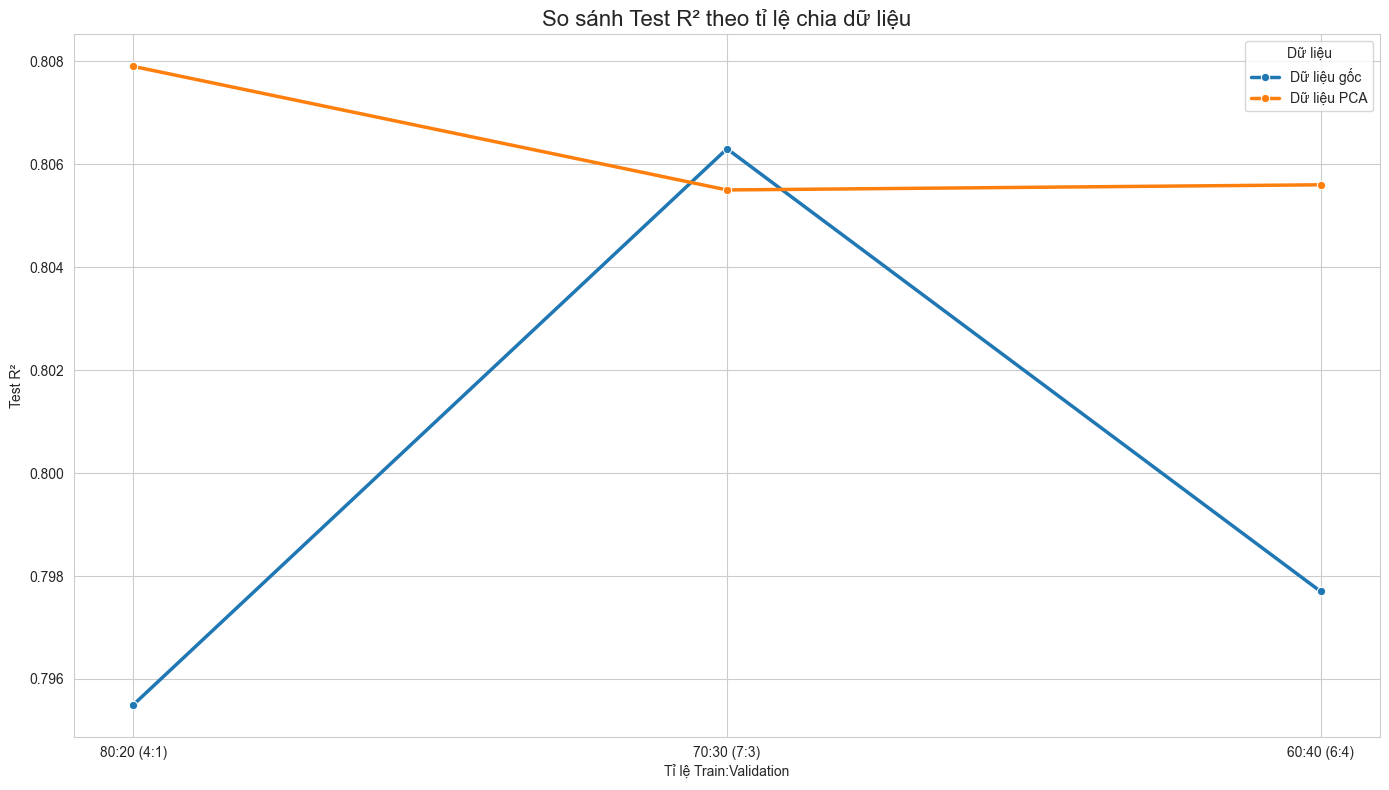

In [1071]:
plt.figure(figsize=(14, 8))

# Biểu đồ R² theo tỉ lệ
sns.set_style("whitegrid")
results_plot = results_df[results_df['Dữ liệu'].str.contains('gốc|PCA') & ~results_df['Dữ liệu'].str.contains('Ridge|Lasso')]

sns.lineplot(data=results_plot, x='Tỉ lệ', y='Test R²', hue='Dữ liệu', marker='o', linewidth=2.5)
plt.title('So sánh Test R² theo tỉ lệ chia dữ liệu', fontsize=16)
plt.ylabel('Test R²')
plt.xlabel('Tỉ lệ Train:Validation')
plt.legend(title='Dữ liệu')
plt.tight_layout()
plt.savefig('../results/figures/r2_by_split_ratio.png', dpi=300)
plt.show()

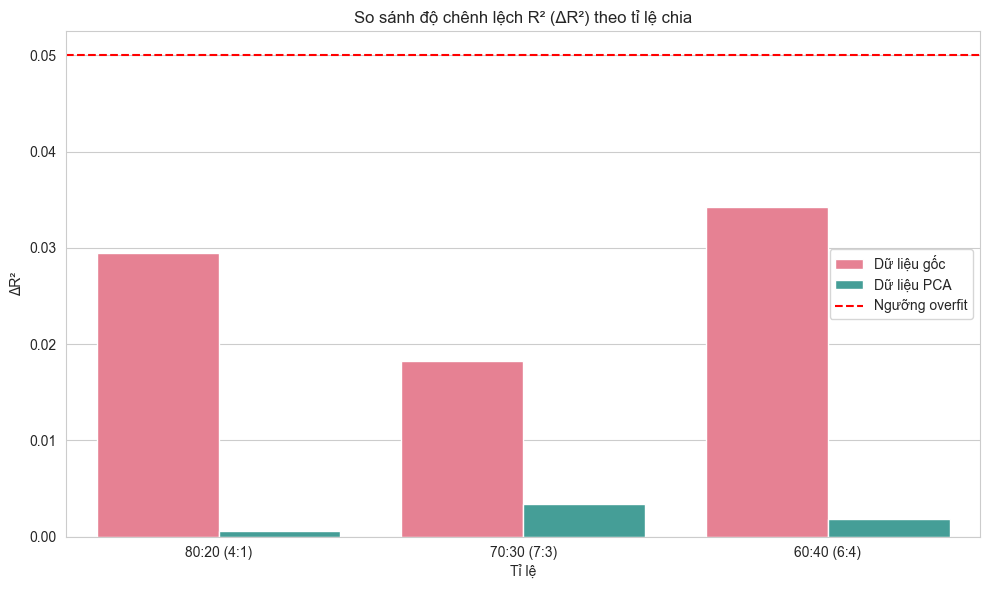

In [1072]:
# Biểu đồ ΔR² theo tỉ lệ
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Tỉ lệ', y='ΔR²', hue='Dữ liệu', palette='husl')
plt.axhline(0.05, color='red', linestyle='--', label='Ngưỡng overfit')
plt.title('So sánh độ chênh lệch R² (ΔR²) theo tỉ lệ chia')
plt.legend()
plt.tight_layout()
plt.savefig('../results/figures/delta_r2_comparison.png')
plt.show()

In [1073]:
# Lọc dữ liệu
df_orig = results_df[results_df['Dữ liệu'].str.contains('gốc')]
df_pca  = results_df[results_df['Dữ liệu'].str.contains('PCA')]

# Tính trung bình ΔR²
mean_orig = df_orig['ΔR²'].mean()
mean_pca  = df_pca['ΔR²'].mean()

# % giảm
percent_reduction = ((mean_orig - mean_pca) / mean_orig) * 100

print(f"ΔR² trung bình (dữ liệu gốc): {mean_orig:.4f}")
print(f"ΔR² trung bình (dữ liệu PCA):  {mean_pca:.4f}")
print(f"PCA giúp giảm ΔR²: {percent_reduction:.1f}%")

ΔR² trung bình (dữ liệu gốc): 0.0273
ΔR² trung bình (dữ liệu PCA):  0.0019
PCA giúp giảm ΔR²: 92.9%


Nhận xét:
- Dữ liệu gốc luôn cho Test R² cao hơn PCA
- Tỉ lệ 7:3 là tốt nhất cho cả hai
- Tỉ lệ 7:3 là tối ưu – Test R² cao nhất, ΔR² thấp nhất
- Không có overfit ở bất kỳ trường hợp nào
- ΔR² < 0.05 → mô hình tổng quát hóa tốt
- PCA giúp giảm ΔR² ~93%
- Dữ liệu gốc mạnh hơn về hiệu suất, PCA mạnh hơn về tổng quát hóa
